In [133]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (
    Binarizer,
    StandardScaler,
    LabelBinarizer,
    OneHotEncoder,
)
from sklearn.linear_model import LogisticRegression
from sklearnex import patch_sklearn

patch_sklearn()
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.neural_network import MLPClassifier

# import dtale
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# sns.set()
pd.options.display.max_columns = 50
pd.options.plotting.backend = "plotly"
from sklearn import set_config
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process.kernels import (
    Product,
    RBF,
    CompoundKernel,
    Exponentiation,
    Matern,
    Sum,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from category_encoders import (
    TargetEncoder,
    BackwardDifferenceEncoder,
    BaseNEncoder,
    BinaryEncoder,
    CatBoostEncoder,
    CatBoostEncoder,
    GLMMEncoder,
    HelmertEncoder,
    JamesSteinEncoder,
    PolynomialEncoder,
    QuantileEncoder,
    SumEncoder,
    SummaryEncoder,
    WOEEncoder,
)

set_config(display="diagram")
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import warnings
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
import plotly.express as px

warnings.filterwarnings("ignore")
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
    GradientBoostingClassifier,
)
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    # StratifiedGroupKFold,
    StratifiedKFold,
)
import sigopt

from sklearn.naive_bayes import (
    BernoulliNB,
    CategoricalNB,
    MultinomialNB,
    ComplementNB,
    GaussianNB,
)
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import QuantileTransformer

nb_est = [CategoricalNB(), MultinomialNB(), ComplementNB(), GaussianNB()]
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.tree import export_graphviz, plot_tree

# import seaborn as sns
# import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.feature_selection import (
    mutual_info_classif,
    SelectKBest,
    f_classif,
    chi2,
    RFE,
    SelectFdr,
    SelectFpr,
    SelectFwe,
    SelectPercentile,
)
from tbb import Monkey

# from xgboost import XGBClassifier
from joblib import parallel_backend
from category_encoders.wrapper import PolynomialWrapper, NestedCVWrapper

# from autosklearn.automl import AutoMLClassifier
import sklearn.metrics

dtype_info = {
    "v_1": "Binary",
    "v_26": "Binary",
    "v_11": "Binary",
    "v_14": "Binary",
    "v_30": "Binary",
    "v_28": "Binary",
    "v_9": "Binary",
    "v_27": "Binary",
    "v_32": "Nominal",
    "v_4": "Nominal",
    "v_3": "Nominal",
    "v_20": "Nominal",
    "v_21": "Nominal",
    "v_18": "Nominal",
    "v_25": "Nominal",
    "v_12": "Nominal",
    "v_31": "Ordinal",
    "v_15": "Ordinal",
    "v_19": "Ordinal",
    "v_13": "Ordinal",
    "v_33": "Ordinal",
    "v_17": "Ordinal",
    "v_29": "Ordinal",
    "v_23": "Ordinal",
    "v_6": "Ordinal",
    "v_24": "Ordinal",
    "v_10": "Ordinal",
    "v_5": "Ordinal",
    "v_22": "Ordinal",
    "v_0": "Ordinal",
    "v_16": "Ratio",
    "v_2": "Ratio",
    "v_8": "Ratio",
    "v_7": "Ratio",
    "v_39": "Ratio",
    "v_37": "Ratio",
    "v_38": "Ratio",
    "v_34": "Ratio",
    "v_40": "Ratio",
    "v_36": "Ratio",
    "v_35": "Ratio",
}
# data = pd.read_csv(
#     "../data/train.csv",
#     index_col=0,
# )
data__ = pd.read_parquet("../data/data_with_ridit.hdfs", engine="fastparquet")
prediction_data = pd.read_parquet("../data/test.parquet", engine="fastparquet")
data = pd.read_parquet("../data/train.parquet", engine="fastparquet")
ordinal = [i for i in dtype_info if dtype_info[i] == "Ordinal"]
nominal = [i for i in dtype_info if dtype_info[i] == "Nominal"]
binary = [i for i in dtype_info if dtype_info[i] == "Binary"]
ratio = [i for i in dtype_info if dtype_info[i] == "Ratio"]


final_data = pd.read_parquet("../data/final_data.parquet", engine="fastparquet")
final_pred_data = pd.read_parquet(
    "../data/final_pred_data.parquet", engine="fastparquet"
)


def categorise_data(data):
    ordinal_data = data.loc[:, ordinal]
    nominal_data = data.loc[:, nominal]
    binary_data = data.loc[:, binary]
    ratio_data = data.loc[:, ratio]
    return ordinal_data, nominal_data, binary_data, ratio_data


ordinal_data, nominal_data, binary_data, ratio_data = categorise_data(final_data)


def gen_train_test(data, p):
    Y = data.label
    X_2 = Y_2 = Y[Y == 2].index
    X_0 = Y_0 = Y[Y == 0].index
    X_1 = Y_1 = Y[Y == 1].index
    train_size = int(p * Y_2.shape[0])
    test_size = int((1 - p) * Y_2.shape[0])

    train_idx_2 = np.random.choice(Y_2, (train_size,))
    train_idx_1 = np.random.choice(Y_1, (train_size,))
    train_idx_0 = np.random.choice(Y_0, (train_size,))
    train_idx = np.r_[train_idx_0, train_idx_1, train_idx_2]
    # train_idx.shape

    test_idx_2 = np.random.choice(np.setdiff1d(Y_2, train_idx_2), (test_size,))
    test_idx_1 = np.random.choice(np.setdiff1d(Y_1, train_idx_1), (test_size,))
    test_idx_0 = np.random.choice(np.setdiff1d(Y_0, train_idx_0), (test_size,))
    test_idx = np.r_[test_idx_0, test_idx_1, test_idx_2]
    # test_idx.shape
    return train_idx, test_idx


def best_n_features(n, X_train, y_train):
    ohe = OneHotEncoder(
        min_frequency=0.00001, handle_unknown="infrequent_if_exist", sparse=False
    )
    X_train_t = ohe.fit_transform(X_train)
    mic = mutual_info_classif(X_train_t, y_train, discrete_features=True)

    return ohe.get_feature_names_out()[mic.argsort()[-n:]]


# prediction_data = pd.read_pickle("../data/pred_data.pkl")

import os
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

# est_ = [("cnb",CategoricalNB()),]
def iv_woe(data, target, bins=10, show_woe=False):

    # Empty Dataframe
    newDF, woeDF = pd.DataFrame(), pd.DataFrame()

    # Extract Column Names
    cols = data.columns

    # Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in "bifc") and (len(np.unique(data[ivars])) > 1000):
            binned_x = pd.qcut(data[ivars], bins, duplicates="drop")
            d0 = pd.DataFrame({"x": binned_x, "y": data[target]})
        else:
            d0 = pd.DataFrame({"x": data[ivars], "y": data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ["Cutoff", "N", "Events"]
        d["% of Events"] = np.maximum(d["Events"], 0.5) / d["Events"].sum()
        d["Non-Events"] = d["N"] - d["Events"]
        d["% of Non-Events"] = np.maximum(d["Non-Events"], 0.5) / d["Non-Events"].sum()
        d["WoE"] = np.log(d["% of Non-Events"] / d["% of Events"])
        d["IV"] = d["WoE"] * (d["% of Non-Events"] - d["% of Events"])
        d.insert(loc=0, column="Variable", value=ivars)
        print("Information value of " + ivars + " is " + str(round(d["IV"].sum(), 6)))
        temp = pd.DataFrame(
            {"Variable": [ivars], "IV": [d["IV"].sum()]}, columns=["Variable", "IV"]
        )
        newDF = pd.concat([newDF, temp], axis=0)
        woeDF = pd.concat([woeDF, d], axis=0)

        # Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF


baseline_prediction_data = pd.read_parquet("../data/baseline.parquet")

os.environ["SIGOPT_PROJECT"] = "notebooks"

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
# final_data = data.copy()
# final_pred_data = prediction_data.copy()


def remove_nominal_junk(
    hi_f,
    final_data: pd.DataFrame = final_data,
    data: pd.DataFrame = data,
    final_pred_data: pd.DataFrame = final_pred_data,
    prediction_data: pd.DataFrame = prediction_data,
):
    # hi_f = nominal
    hi1 = data.loc[:, hi_f]
    hi2 = prediction_data.loc[:, hi_f]

    for c in hi_f:
        print(c)
        # print(hi_df[c].unique())
        # print('-'*80)
        print("Junk")
        junk = np.setdiff1d(hi1[c].unique(), hi2[c].unique())
        print(junk)
        # vc1 = hi1[c].value_counts().to_dict()
        # total_junk = 0
        for j in junk:
            junk_idx = final_data[final_data[c] == j].index
            final_data.loc[junk_idx, c] = 0
        #     total_junk+= vc1[j]
        # print(total_junk)

        # print('Missing')
        missing = np.setdiff1d(hi2[c].unique(), hi1[c].unique())
        print(missing)
        # vc2 = hi2[c].value_counts().to_dict()
        # total_missing=0
        for m in missing:
            missing_idx = final_pred_data[final_pred_data[c] == m].index
            final_pred_data.loc[missing_idx, c] = 0
        # print(total_missing)
        print("-" * 80)
    return final_data, final_pred_data


def round_up_ordinal(
    hi_f,
    final_data: pd.DataFrame = final_data,
    final_pred_data: pd.DataFrame = final_pred_data,
):
    final_data.loc[:, hi_f] = final_data.loc[:, hi_f].round(1)
    final_pred_data.loc[:, hi_f] = final_pred_data.loc[:, hi_f].round(1)
    return final_data, final_pred_data


def register_category(
    hi_f,
    final_data: pd.DataFrame = final_data,
    final_pred_data: pd.DataFrame = final_pred_data,
):
    final_data.loc[:, hi_f] = final_data.loc[:, hi_f].astype("category")
    final_pred_data.loc[:, hi_f] = final_pred_data.loc[:, hi_f].astype("category")
    return final_data, final_pred_data


# final_data, final_pred_data = round_up_ordinal(ordinal)
# final_data, final_pred_data = remove_nominal_junk(nominal)
# final_data, final_pred_data = register_category(ordinal+nominal)
# final_data.to_parquet('../data/final_data.parquet',engine='fastparquet',compression='brotli')
# final_pred_data.to_parquet('../data/final_pred_data.parquet',engine='fastparquet',compr
from distributed import Client

client = Client()

In [36]:
from joblib import Memory
from sklearn.neural_network import MLPClassifier

ms = Memory(location="../data/tpot1/")
# kernel_rbf = Exponentiation(RBF(),30)
# comp_kern = Sum(Matern(nu=1),kernel_rbf)

estimators = [
    # SVC(),
    # NuSVC(),
    # CategoricalNB(),
    MultinomialNB(),
    # ComplementNB(),
    # GaussianNB(),
    # AdaBoostClassifier(),
    # PassiveAggressiveClassifier(),
    # SGDClassifier(),
    # MLPClassifier(),
    # KNeighborsClassifier(),
    # RadiusNeighborsClassifier(),
    # ExtraTreesClassifier(),
    # RandomForestClassifier(),
    # DecisionTreeClassifier(),
    # HistGradientBoostingClassifier(),
    # GradientBoostingClassifier(),
]
est_ = []
for e in estimators:
    est_.append((e.__class__.__name__, e))


train_idx, test_idx = gen_train_test(data, 0.8)
X_train, y_train = (
    final_data.loc[train_idx, nominal],
    data["label"].loc[train_idx],
)
X_test, y_test = (
    final_data.loc[test_idx, nominal],
    data["label"].loc[test_idx],
)
# model = StackingClassifier(
#     estimators=est_,
#     final_estimator=RandomForestClassifier(n_jobs=-1, max_features=None),
#     cv=4,
#     stack_method="auto",
#     n_jobs=-1,
#     passthrough=True,
#     verbose=1,
# )
ohe = OneHotEncoder(
    min_frequency=0.001, handle_unknown="infrequent_if_exist", sparse=False
)
# dtc = RandomForestClassifier(random_state=42,n_jobs=-1, criterion='entropy', max_features=None)
model = GaussianProcessClassifier(
    n_jobs=-1, n_restarts_optimizer=10, max_iter_predict=10000
)
fs = SelectKBest(score_func=mutual_info_classif, k=90)
ovr = Pipeline(
    [("OHE", ohe), ("feature_selector", fs), ("Model", model)],
    memory=ms,
)
with parallel_backend("threading"):
    ovr.fit(X_train, y_train)
    print(classification_report(ovr.predict(X_test), y_test))

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=0.001,
              sparse=False), 
     v_32  v_4  v_3 v_20 v_21 v_18 v_25 v_12
id                                          
285     6   76   39    0    3    3   27   16
2034    0  172   96  257   10  106  181   22
2226   92   96  131  242    3  121  165   16
3438  120   55   91  252   11   14  183   22
1285  116   59   39  251    3  103  181   16
...   ...  ...  ...  ...  ...  ...  ...  ...
2162    6   96   45    6    3   23    1   16
2832    6  121   17   60    3   30    3   41
2663  116  167   44  168    3  103  183   16
2069    6  155   70  251    3  103  181   16
1541   13  121    0  168    7   20    7   23

[1656 rows x 8 columns], 
id
285     0
2034    0
2226    0
3438    0
1285    0
       ..
2162    2
2832    2
2663    2
2069    2
1541    2
Name: label, Len

In [7]:
%reload_ext sigopt
# %sigopt config

In [ ]:
dtc__params = {
    "ccp_alpha": 0.0,
    "class_weight": None,
    "criterion": "gini",
    "max_depth": None,
    "max_features": None,
    "max_leaf_nodes": None,
    "min_impurity_decrease": 0.0,
    "min_impurity_split": None,
    "min_samples_leaf": 1,
    "min_samples_split": 2,
    "min_weight_fraction_leaf": 0.0,
    "random_state": None,
    "splitter": "best",
}

# dtc.get_params()
def evaluate_best_dtc(n_cv):
    global data
    dtc__params = {
        "ccp_alpha": 0.0,
        "class_weight": None,
        "criterion": "gini",
        "max_depth": None,
        "max_features": None,
        "max_leaf_nodes": None,
        "min_impurity_decrease": 0.0,
        "min_impurity_split": None,
        "min_samples_leaf": np.random.randint(1, 5),
        "min_samples_split": 2,
        "min_weight_fraction_leaf": 0.0,
        "random_state": 42,
        "splitter": "best",
    }
    sigopt.log_dataset("Ordinal_Data")
    sigopt.log_model(DecisionTreeClassifier().__class__.__name__)
    sigopt.log_metadata(key="Features", value=ordinal)

    train_idx, test_idx = gen_train_test(data, 1.0)
    # X_train, y_train = ordinal_data.loc[train_idx, :], pd.get_dummies(data['label'].loc[train_idx])
    X_train, y_train = ordinal_data.loc[train_idx, :], data["label"].loc[train_idx]
    for k, v in dtc__params.items():
        sigopt.params.setdefault(k, v)
    # clf = OneVsRestClassifier(model, n_jobs=-1)
    with parallel_backend("threading", n_jobs=-1):
        model = DecisionTreeClassifier(
            max_features=14,
            min_samples_leaf=dtc__params["min_samples_leaf"],
            min_impurity_decrease=sigopt.params.min_impurity_decrease,
            random_state=42,
            ccp_alpha=sigopt.params.ccp_alpha,
        )
        cv_results = cross_validate(
            model,
            X_train,
            y_train,
            scoring="f1_macro",
            return_train_score=True,
            n_jobs=-1,
            cv=n_cv,
            return_estimator=True,
        )
        sigopt.params.min_samples_leaf = model.min_samples_leaf
    # sigopt.params.ccp_alpha=0
    # print(sigopt.params)
    sigopt.log_metric(name="f1_macro", value=cv_results["test_score"].mean())
    return cv_results

In [8]:
%%experiment
{
    'name': 'DTC Optimization',
    'metrics': [
        {
            'name': 'f1_macro',
            'strategy': 'optimize',
            'objective': 'maximize',
        }
    ],
    'parameters': [
        {
            'name': 'min_impurity_decrease',
            'type': 'double',
            'bounds': {'min': 0.0, 'max': 1.0}
        }

    ],
    'type':'offline',
    'budget': 10
}



Experiment created, view it on the SigOpt dashboard at https://app.sigopt.com/experiment/527060


In [ ]:
%%optimize 
evaluate_best_dtc(5)

In [ ]:
# X_train, y_train = nom_dum.loc[train_idx,:], data['label'].loc[train_idx]
# X_train, y_train = nominal_data.loc[train_idx,:], data['label'].loc[train_idx]
# X_train, y_train = nom_dum.iloc[train_idx,imp_nom], data['label'].loc[train_idx]
# cv_results = cross_validate(dtc, X_train, y_train, scoring='f1_macro', return_train_score=True, n_jobs=-1, cv=10, return_estimator=True, )
# cv_results
train_idx, test_idx = gen_train_test(data, 0.75)
X_train, y_train = (
    nominal_data.loc[train_idx, :].astype("category"),
    data["label"].loc[train_idx],
)
X_test, y_test = (
    nominal_data.loc[test_idx, :].astype("category"),
    data["label"].loc[test_idx],
)

In [ ]:
def qt_trial():
    qt = QuantileTransformer(
        n_quantiles=200, output_distribution="normal", random_state=42
    )
    train_idx, test_idx = gen_train_test(data, 1.0)
    X_train, y_train = (
        ordinal_data.loc[
            train_idx, ["v_10", "v_17", "v_5", "v_29", "v_19", "v_22", "v_6"]
        ],
        data["label"].loc[train_idx],
    )
    for c in X_train:
        med = X_train[c].median()
        X_train[c] = (X_train[c]) / med
    with parallel_backend("threading", n_jobs=-1):
        model = DecisionTreeClassifier(
            criterion="entropy",
            # max_features='sqrt',
            # learning_rate=0.
            # n_jobs=-1,
            # min_samples_leaf=1,
            random_state=42,
        )
        model_wf = make_pipeline(qt, model)
        cv_results = cross_validate(
            model_wf,
            X_train,
            y_train,
            scoring="f1_macro",
            return_train_score=True,
            n_jobs=-1,
            cv=3,
            return_estimator=True,
        )
    cv_results["test_score"].mean(), cv_results["train_score"].mean()

In [ ]:
category_data = data.loc[:, nominal + ordinal].astype("category")
pre_category_data = prediction_data.loc[:, nominal + ordinal].astype("category")

In [ ]:
N = pre_category_data.shape[0]

for i in [0.1, 0.25, 0.5, 0.75, 0.80]:
    s = f'pfig.add_hline(y={i*N}, line_dash="dot", line_width=1,line_color="red",annotation_text="{i*100}%", annotation_position="bottom right",annotation_font_size=11,annotation_font_color="black")'
    print(s)

In [ ]:
N = pre_category_data.shape[0]
# fig = plt.axhline(y = 0.5*N, color = 'r', linestyle = '--', label = "50%")
# fig = plt.axhline(y = 0.80*N, color = 'g', linestyle = '--', label = "80%")
# fig = plt.axhline(y = 0.25*N, color = 'y', linestyle = '--', label = "25%")
# fig = plt.axhline(y = 0.15*N, color = 'black', linestyle = '--', label = "15%")

# fig = plt.legend()
pfig = (
    pre_category_data.describe()
    .loc["freq", :]
    .sort_values()
    .plot(kind="bar", title="Category Data Max_Freq from Test set")
)
pfig.add_hline(
    y=162.8,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="10.0%",
    annotation_position="bottom right",
    annotation_font_size=11,
    annotation_font_color="black",
)
pfig.add_hline(
    y=407.0,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="25.0%",
    annotation_position="bottom left",
    annotation_font_size=11,
    annotation_font_color="black",
)
pfig.add_hline(
    y=814.0,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="50.0%",
    annotation_position="bottom right",
    annotation_font_size=11,
    annotation_font_color="black",
)
pfig.add_hline(
    y=0.7 * N,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="70.0%",
    annotation_position="bottom left",
    annotation_font_size=11,
    annotation_font_color="black",
)
pfig.add_hline(
    y=1302.4,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="80.0%",
    annotation_position="bottom right",
    annotation_font_size=11,
    annotation_font_color="black",
)

pfig

In [ ]:
N = pre_category_data.shape[0]
# fig = plt.axhline(y = 0.5*N, color = 'r', linestyle = '--', label = "50%")
# fig = plt.axhline(y = 0.80*N, color = 'g', linestyle = '--', label = "80%")
# fig = plt.axhline(y = 0.25*N, color = 'y', linestyle = '--', label = "25%")
# fig = plt.axhline(y = 0.15*N, color = 'black', linestyle = '--', label = "15%")

# fig = plt.legend()
pfig = (
    pre_category_data.round(2)
    .describe()
    .loc["freq", :]
    .sort_values()
    .plot(kind="bar", title="Category Data Max_Freq from Test set round 2")
)
pfig.add_hline(
    y=162.8,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="10.0%",
    annotation_position="bottom right",
    annotation_font_size=11,
    annotation_font_color="black",
)
pfig.add_hline(
    y=407.0,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="25.0%",
    annotation_position="bottom left",
    annotation_font_size=11,
    annotation_font_color="black",
)
pfig.add_hline(
    y=814.0,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="50.0%",
    annotation_position="bottom right",
    annotation_font_size=11,
    annotation_font_color="black",
)
pfig.add_hline(
    y=0.7 * N,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="70.0%",
    annotation_position="bottom left",
    annotation_font_size=11,
    annotation_font_color="black",
)
pfig.add_hline(
    y=1302.4,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="80.0%",
    annotation_position="bottom right",
    annotation_font_size=11,
    annotation_font_color="black",
)

pfig

In [ ]:
N = category_data.shape[0]
fig = (
    category_data.round(1)
    .describe()
    .loc["freq", :]
    .sort_values()
    .plot(kind="bar", title="Category Data Max_Freq from Train set")
)
fig.add_hline(
    y=379.6,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="10.0%",
    annotation_position="bottom right",
    annotation_font_size=11,
    annotation_font_color="black",
)
fig.add_hline(
    y=949.0,
    line_dash="dot",
    line_width=1,
    line_color="green",
    annotation_text="25.0%",
    annotation_position="bottom left",
    annotation_font_size=11,
    annotation_font_color="black",
)
fig.add_hline(
    y=1898.0,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="50.0%",
    annotation_position="bottom right",
    annotation_font_size=11,
    annotation_font_color="black",
)
fig.add_hline(
    y=0.7 * N,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="70.0%",
    annotation_position="bottom left",
    annotation_font_size=11,
    annotation_font_color="black",
)
fig.add_hline(
    y=3036.8,
    line_dash="dot",
    line_width=1,
    line_color="red",
    annotation_text="80.0%",
    annotation_position="top right",
    annotation_font_size=11,
    annotation_font_color="black",
)


# fig = plt.axhline(y = 0.60*N, color = 'r', linestyle = '--', label = "50%")
# fig = plt.axhline(y = 0.75*N, color = 'g', linestyle = '--', label = "75%")
# fig = plt.axhline(y = 0.25*N, color = 'y', linestyle = '--', label = "25%")
# fig = plt.axhline(y = 0.15*N, color = 'black', linestyle = '--', label = "15%")
# fig = plt.legend()
fig

In [ ]:
# fig = data.corrwith(data.label, method='kendall').sort_values().iloc[:-1].plot(kind='bar', figsize=(20,5))
fig = (
    data.round(1)
    .corrwith(data.label, method="kendall")
    .sort_values()
    .iloc[:-1]
    .plot(kind="bar", title="Kendall Correlation")
)
fig

In [ ]:
# fig = data.corrwith(data.label, method='spearman').sort_values().iloc[:-1].plot(kind='bar', figsize=(20,5))
fig = (
    data.round(1)
    .corrwith(data.label, method="spearman")
    .sort_values()
    .iloc[:-1]
    .plot(kind="bar", title="Spearman Correlation")
)
fig

In [ ]:
# fig = data.corrwith(data.label, method='pearson').sort_values().iloc[:-1].plot(kind='bar', figsize=(20,5))
fig = (
    data.round(1)
    .corrwith(data.label, method="pearson")
    .sort_values()
    .iloc[:-1]
    .plot(kind="bar", title="Pearson Correlation")
)
fig

In [ ]:
nominal

In [ ]:
print(ordinal)

In [ ]:
# pre_category_data.describe()
total_category_data = pd.concat(
    [category_data, pre_category_data],
    axis=0,
).astype("category")

In [ ]:
# categorise_data
tc_stat = total_category_data.describe()
tc_stat.loc["freq", :] = tc_stat.loc["freq", :] / 5424
tc_stat.loc["freq", :].sort_values().index

In [ ]:
def print_junk_missing(
    hi_f, data: pd.DataFrame = data, prediction_data: pd.DataFrame = prediction_data
):
    # hi_f = nominal
    hi1 = data.loc[:, hi_f].round(1)
    hi2 = prediction_data.loc[:, hi_f].round(1)

    for c in hi_f:
        print(c)
        # print(hi_df[c].unique())
        # print('-'*80)
        print("Junk")
        junk = np.setdiff1d(hi1[c].unique(), hi2[c].unique())
        print(np.setdiff1d(hi1[c].unique(), hi2[c].unique()))
        vc1 = hi1[c].value_counts().to_dict()
        total_junk = 0
        for j in junk:
            total_junk += vc1[j]
        print(total_junk)
        print("Missing")
        missing = np.setdiff1d(hi2[c].unique(), hi1[c].unique())
        print(np.setdiff1d(hi2[c].unique(), hi1[c].unique()))
        vc2 = hi2[c].value_counts().to_dict()
        total_missing = 0
        for m in missing:
            total_missing += vc2[m]
        print(total_missing)
        print("-" * 80)


print_junk_missing(nominal, data=final_data, prediction_data=final_pred_data)

In [ ]:
final_data.corrwith(final_data.label, method="kendall").sort_values().iloc[:-1].plot(
    kind="bar"
)

In [ ]:
final_cat_df = final_data.select_dtypes(include="category")
count = 0
for c in nominal:

    _unique = final_cat_df[c].unique()
    count += len(_unique)
    print(len(_unique))
count

In [ ]:
ohe_nominal_final = pd.get_dummies(final_data, columns=nominal, sparse=False)
ohe_train_labels = pd.get_dummies(data.label)

# ohe_nominal_final.corrwith(data.label, method='kendall').sort_values().iloc[:-1].plot(kind='bar')
ohe_nominal_final.columns

In [ ]:
ohe_nominal_final.corrwith(ohe_train_labels[0], method="kendall").sort_values().iloc[
    :-1
]

In [ ]:
ohe_nominal_final.corrwith(ohe_train_labels[1], method="kendall").sort_values().iloc[
    :-1
]

In [ ]:
ohe_nominal_final.corrwith(ohe_train_labels[2], method="kendall").sort_values().iloc[
    :-1
]

In [189]:
from tpot import TPOTClassifier

run_time = time.asctime().replace(" ", "_")[11:].replace(":", "_")
tclf = TPOTClassifier(
    generations=10,
    population_size=10,
    n_jobs=-1,
    scoring="f1_macro",
    random_state=42,
    warm_start=True,
    periodic_checkpoint_folder="../data/tpot/periodic_checkpoints/",
    use_dask=True,
    verbosity=0,
    log_file=f"../data/tpot_{run_time}.log",
)
# tclf.fit()
tclf

TPOTClassifier(generations=10, log_file='../data/tpot_08_02_48_2022.log',
               n_jobs=-1,
               periodic_checkpoint_folder='../data/tpot/periodic_checkpoints/',
               population_size=10, random_state=42, scoring='f1_macro',
               use_dask=True, warm_start=True)

In [51]:
train_idx, test_idx = gen_train_test(final_data, 1.0)


X_train = final_data.loc[train_idx, nominal]
y_train = data.label.loc[train_idx]
# y_train = pd.get_dummies(data.label)
from dask.distributed import Client

# with parallel_backend('dask'):
#     warnings.filterwarnings("ignore")

#     tclf.fit(X_train,y_train)
# client = Client()
# from sklearnex import unpatch_sklearn
# unpatch_sklearn()
from sklearn.kernel_approximation import Nystroem

nys = Nystroem(
    n_components=900,
)
nys

Nystroem(n_components=900)

In [55]:
# dtc = RandomForestClassifier(random_state=42,n_jobs=-1, criterion='entropy', max_features=None)
model = GaussianProcessClassifier(
    n_jobs=-1, n_restarts_optimizer=10, max_iter_predict=10000
)
# model = LogisticRegression(max_iter=10000,n_jobs=-1)
# dtc = LogisticRegression(max_iter=10000,n_jobs=-1,random_state=42)
# fs = SelectFpr(alpha=1)
# fs = SelectFwe()
# fs = SelectPercentile(percentile=30)
# fs = SelectFdr(alpha=0.5)
with parallel_backend("dask"):
    cv_results = cross_validate(
        ovr,
        X_train,
        y_train,
        cv=3,
        n_jobs=-1,
        scoring="f1_macro",
        return_train_score=True,
        return_estimator=True,
    )
# client.close()
cv_results

{'fit_time': array([7.00602984, 6.08168387, 9.93439841]),
 'score_time': array([2.10018253, 2.33061242, 2.09937835]),
 'estimator': [Pipeline(memory=Memory(location=../data/tpot/joblib),
           steps=[('OHE',
                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                 min_frequency=1e-05, sparse=False)),
                  ('FS', SelectKBest(k=350)),
                  ('ML',
                   GaussianProcessClassifier(max_iter_predict=10000, n_jobs=-1,
                                             n_restarts_optimizer=10))]),
  Pipeline(memory=Memory(location=../data/tpot/joblib),
           steps=[('OHE',
                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                 min_frequency=1e-05, sparse=False)),
                  ('FS', SelectKBest(k=350)),
                  ('ML',
                   GaussianProcessClassifier(max_iter_predict=10000, n_jobs=-1,
                                             n_

In [162]:
class evaluate_model:
    def __init__(self, model, data=pd.DataFrame(), features=[]):
        self.model = model
        if data.shape[0] > 0:
            self.data = data
        else:
            self.data = pd.read_parquet(
                "../data/final_data.parquet", engine="fastparquet"
            )
        if len(features) > 0:
            self.features = features
        else:
            self.features = list(self.data.columns)
        self.train_idx, self.test_idx = gen_train_test(self.data, 1.0)
        self.X_train = self.data.loc[self.train_idx, self.features]
        self.y_train = self.data.label.loc[self.train_idx]
        self.cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5)
        self.cv_results = None
        self.legacy = 0

    def run(self, custom_model=None):
        if custom_model:
            selected_model = custom_model
        else:
            selected_model = self.model
        # with parallel_backend('threading'):
        cv_results = cross_validate(
            selected_model,
            self.X_train,
            self.y_train,
            cv=self.cv,
            # n_jobs=1,
            scoring=[
                "f1_micro",
                "f1_macro",
                "f1_weighted",
                "precision_micro",
                "precision_macro",
                "precision_weighted",
                "recall_micro",
                "recall_macro",
                "recall_weighted",
            ],
            return_train_score=True,
            return_estimator=True,
            error_score="raise",
        )
        ## Save this results
        self.cv_results = cv_results
        # cv_db.insert_one(cv_results)
        # cnst = {'estimator_params': selected_model.get_params()}
        record = {}
        record["estimator_params"] = selected_model.get_params()
        record["model_name"] = selected_model.__class__.__name__
        record["features"] = list(self.features)
        # record['data_idx'] = {'train_idx': list(self.train_idx),'test_idx': list(self.test_idx)}
        # cnst['fit_time'] = list(cv_results['fit_time'])
        for k, v in cv_results.items():
            if k in ["estimator", "fit_time", "score_time"]:
                continue
            else:
                record[k] = v.mean()
        # cv_db.insert_one(record)
        # for _ in cv_db.find():
        #     print(_.keys())
        if self.legacy == 1:
            # print(self.legacy_run())
            l_rpt = self.legacy_run()
            for k, v in l_rpt.items():
                print(k)
                print("~" * 20)
                print(v)
                print("#" * 90)
        return cv_results

    def plot(self):
        sns.set()
        fig, axes = plt.subplots(3, 3, figsize=(18, 15))
        # fig.layout='constrained'

        metrics = [
            "f1_micro",
            "f1_macro",
            "f1_weighted",
            "precision_micro",
            "precision_macro",
            "precision_weighted",
            "recall_micro",
            "recall_macro",
            "recall_weighted",
        ]
        # for m  in metrics:
        #     n = len(self.cv_results['test_'+m])
        idx = 0
        for i in range(3):
            n = len(self.cv_results["test_" + metrics[0]])
            for j in range(3):
                axes[i, j].plot(
                    range(n),
                    self.cv_results["test_" + metrics[idx]],
                    label=["test_" + metrics[idx]],
                )
                # axes[i,j].plot(range(n),self.cv_results['train_'+metrics[idx]],label=['train_'+metrics[idx]])
                # axes[i,j].fill_between(range(n),self.cv_results['test_'+metrics[idx]],self.cv_results['train_'+metrics[idx]])
                axes[i, j].legend()
                axes[i, j].set_title(metrics[idx])
                # axes[i,j].autoscale(enable=False)
                idx += 1
        plt.legend()

    def plot_metric(self, metric):
        ydata = self.cv_results["test_" + metric]
        n = ydata.shape[0]
        ffig = plt.plot(
            np.arange(n),
            ydata,
        )

        return

    def switch_to_main_data(self):
        self.legacy = 1
        self.X_train_old = self.X_train
        self.y_train_old = self.y_train
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.data.loc[:, self.features], self.data.label
        )
        print("#" * 100)
        print("SWITCHING TO LEGACY MODE")
        print("#" * 100)

    def reset(self):
        self.legacy = 0
        self.X_train = self.X_train_old
        self.y_train = self.y_train_old

    def legacy_run(self):
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
        self.legacy_report = {}
        self.legacy_report["classification_report"] = classification_report(
            self.y_test, self.y_pred
        )
        self.legacy_report[
            "balanced_accuracy"
        ] = sklearn.metrics.balanced_accuracy_score(self.y_test, self.y_pred)
        return self.legacy_report

In [170]:
bs = pd.concat([final_data, baseline_prediction_data], axis=0, ignore_index=True)

In [ ]:
import copy
from category_encoders import utils
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold
import category_encoders as encoders
import pandas as pd
import numpy as np


class PolynomialWrapper(BaseEstimator, TransformerMixin):
    """Extend supervised encoders to n-class labels, where n >= 2.

    The label can be numerical (e.g.: 0, 1, 2, 3,...,n), string or categorical (pandas.Categorical).
    The label is first encoded into n-1 binary columns. Subsequently, the inner supervised encoder
    is executed for each binarized label.

    The names of the encoded features are suffixed with underscore and the corresponding class name
    (edge scenarios like 'dog'+'cat_frog' vs. 'dog_cat'+'frog' are not currently handled).

    The implementation is experimental and the API may change in the future.
    The order of the returned features may change in the future.


    Parameters
    ----------

    feature_encoder: Object
        an instance of a supervised encoder.


    Example
    -------
    >>> from category_encoders import *
    >>> import pandas as pd
    >>> from sklearn.datasets import load_boston
    >>> from category_encoders.wrapper import PolynomialWrapper
    >>> bunch = load_boston()
    >>> y = bunch.target
    >>> y = (y/10).round().astype(int)  # we create 6 artificial classes
    >>> X = pd.DataFrame(bunch.data, columns=bunch.feature_names)
    >>> enc = TargetEncoder(cols=['CHAS', 'RAD'])
    >>> wrapper = PolynomialWrapper(enc)
    >>> encoded = wrapper.fit_transform(X, y)
    >>> print(encoded.info())
    """

    def __init__(self, feature_encoder):
        self.feature_encoder = feature_encoder
        self.feature_encoders = {}
        self.label_encoder = None

    def fit(self, X, y, **kwargs):
        # unite the input into pandas types
        X, y = utils.convert_inputs(X, y)
        y = pd.DataFrame(y, columns=["target"])

        # apply one-hot-encoder on the label
        self.label_encoder = encoders.OneHotEncoder(
            handle_missing="error",
            handle_unknown="error",
            cols=["target"],
            drop_invariant=True,
            use_cat_names=True,
        )
        labels = self.label_encoder.fit_transform(y)
        labels.columns = [column[7:] for column in labels.columns]
        labels = labels.iloc[:, 1:]  # drop one label

        # train the feature encoders
        for class_name, label in labels.iteritems():
            self.feature_encoders[class_name] = copy.deepcopy(self.feature_encoder).fit(
                X, label
            )

    def transform(self, X):
        # unite the input into pandas types
        X = utils.convert_input(X)

        # initialization
        encoded = None
        feature_encoder = None
        all_new_features = pd.DataFrame()

        # transform the features
        for class_name, feature_encoder in self.feature_encoders.items():
            encoded = feature_encoder.transform(X)

            # decorate the encoded features with the label class suffix
            new_features = encoded[feature_encoder.cols]
            new_features.columns = [
                str(column) + "_" + class_name for column in new_features.columns
            ]

            all_new_features = pd.concat((all_new_features, new_features), axis=1)

        # add features that were not encoded
        result = pd.concat(
            (
                encoded[encoded.columns[~encoded.columns.isin(feature_encoder.cols)]],
                all_new_features,
            ),
            axis=1,
        )

        return result

    def fit_transform(self, X, y=None, **fit_params):
        # When we are training the feature encoders, we have to use fit_transform() method on the features.

        # unite the input into pandas types
        X, y = utils.convert_inputs(X, y)
        y = pd.DataFrame(y, columns=["target"])

        # apply one-hot-encoder on the label
        self.label_encoder = encoders.OneHotEncoder(
            handle_missing="error",
            handle_unknown="error",
            cols=["target"],
            drop_invariant=True,
            use_cat_names=True,
        )
        labels = self.label_encoder.fit_transform(y)
        labels.columns = [column[7:] for column in labels.columns]
        labels = labels.iloc[:, 1:]  # drop one label

        # initialization of the feature encoders
        encoded = None
        feature_encoder = None
        all_new_features = pd.DataFrame()

        # fit_transform the feature encoders
        for class_name, label in labels.iteritems():
            feature_encoder = copy.deepcopy(self.feature_encoder)
            encoded = feature_encoder.fit_transform(X, label)

            # decorate the encoded features with the label class suffix
            new_features = encoded[feature_encoder.cols]
            new_features.columns = [
                str(column) + "_" + class_name for column in new_features.columns
            ]

            all_new_features = pd.concat((all_new_features, new_features), axis=1)
            self.feature_encoders[class_name] = feature_encoder

        # add features that were not encoded
        result = pd.concat(
            (
                encoded[encoded.columns[~encoded.columns.isin(feature_encoder.cols)]],
                all_new_features,
            ),
            axis=1,
        )

        return result


class NestedCVWrapper(BaseEstimator, TransformerMixin):
    """
    Extends supervised encoders with the nested cross validation on the training data to minimise overfitting.

    For a validation or a test set, supervised encoders can be used as follows:

        X_train_encoded = encoder.fit_transform(X_train, y_train)
        X_valid_encoded = encoder.transform(X_valid)

    However, the downstream model will be overfitting to the encoded training data due to target leakage.
    Using out-of-fold encodings is an effective way to prevent target leakage. This is equivalent to:

        X_train_encoded = np.zeros(X.shape)
        for trn, val in kfold.split(X, y):
            encoder.fit(X[trn], y[trn])
            X_train_encoded[val] = encoder.transform(X[val])

    This can be used in place of the "inner folds" as discussed here:
        https://sebastianraschka.com/faq/docs/evaluate-a-model.html

    See README.md for a list of supervised encoders.

    Discussion: Although leave-one-out encoder internally performs leave-one-out cross-validation, it is
    actually the most overfitting supervised model in our library. To illustrate the issue, let's imagine we
    have a totally unpredictive nominal feature and a perfectly balanced binary label. A supervised encoder
    should encode the feature into a constant vector as the feature is unpredictive of the label. But when we
    use leave-one-out cross-validation, the label ratio cease to be perfectly balanced and the wrong class
    label always becomes the majority in the training fold. Leave-one-out encoder returns a seemingly
    predictive feature. And the downstream model starts to overfit to the encoded feature. Unfortunately,
    even 10-fold cross-validation is not immune to this effect:
        http://www.kdd.org/exploration_files/v12-02-4-UR-Perlich.pdf
    To decrease the effect, it is recommended to use a low count of the folds. And that is the reason why
    this wrapper uses 5 folds by default.

    Based on the empirical results, only LeaveOneOutEncoder benefits greatly from this wrapper. The remaining
    encoders can be used without this wrapper.


    Parameters
    ----------
    feature_encoder: Object
        an instance of a supervised encoder.

    cv: int or sklearn cv Object
        if an int is given, StratifiedKFold is used by default, where the int is the number of folds.

    shuffle: boolean, optional
        whether to shuffle each classes samples before splitting into batches. Ignored if a CV method is provided.

    random_state: int, RandomState instance or None, optional, default=None
        if int, random_state is the seed used by the random number generator. Ignored if a CV method is provided.


    Example
    -------
    >>> from category_encoders import *
    >>> from category_encoders.wrapper import NestedCVWrapper
    >>> from sklearn.datasets import load_boston
    >>> from sklearn.model_selection import GroupKFold, train_test_split
    >>> bunch = load_boston()
    >>> y = bunch.target
    >>> # we create 6 artificial classes and a train/validation/test split
    >>> y = (y/10).round().astype(int)
    >>> X = pd.DataFrame(bunch.data, columns=bunch.feature_names)
    >>> X_train, X_test, y_train, _ = train_test_split(X, y)
    >>> X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)
    >>> # Define the nested CV encoder for a supervised encoder
    >>> enc_nested = NestedCVWrapper(TargetEncoder(cols=['CHAS', 'RAD']), random_state=42)
    >>> # Encode the X data for train, valid & test
    >>> X_train_enc, X_valid_enc, X_test_enc = enc_nested.fit_transform(X_train, y_train, X_test=(X_valid, X_test))
    >>> print(X_train_enc.info())
    """

    def __init__(self, feature_encoder, cv=5, shuffle=True, random_state=None):
        self.feature_encoder = feature_encoder
        self.__name__ = feature_encoder.__class__.__name__
        self.shuffle = shuffle
        self.random_state = random_state

        if type(cv) == int:
            self.cv = StratifiedKFold(
                n_splits=cv, shuffle=shuffle, random_state=random_state
            )
        else:
            self.cv = cv

    def fit(self, X, y, **kwargs):
        """
        Calls fit on the base feature_encoder without nested cross validation
        """
        self.feature_encoder.fit(X, y, **kwargs)

    def transform(self, X):
        """
        Calls transform on the base feature_encoder without nested cross validation
        """
        return self.feature_encoder.transform(X)

    def fit_transform(self, X, y=None, X_test=None, groups=None, **fit_params):
        """
        Creates unbiased encodings from a supervised encoder as well as infer encodings on a test set
        :param X: array-like, shape = [n_samples, n_features]
                  Training vectors for the supervised encoder, where n_samples is the number of samples
                  and n_features is the number of features.
        :param y: array-like, shape = [n_samples]
                  Target values for the supervised encoder.
        :param X_test, optional: array-like, shape = [m_samples, n_features] or a tuple of array-likes (X_test, X_valid...)
                       Vectors to be used for inference by an encoder (e.g. test or validation sets) trained on the
                       full X & y sets. No nested folds are used here
        :param groups: Groups to be passed to the cv method, e.g. for GroupKFold
        :param fit_params:
        :return: array, shape = [n_samples, n_numeric + N]
                 Transformed values with encoding applied. Returns multiple arrays if X_test is not None
        """
        X, y = utils.convert_inputs(X, y)

        # Get out-of-fold encoding for the training data
        out_of_fold = np.zeros(X.shape)

        for trn_idx, oof_idx in self.cv.split(X, y, groups):
            feature_encoder = copy.deepcopy(self.feature_encoder)
            feature_encoder.fit(X.iloc[trn_idx], y.iloc[trn_idx])
            out_of_fold[oof_idx] = feature_encoder.transform(X.iloc[oof_idx])

        out_of_fold = pd.DataFrame(out_of_fold, columns=X.columns)

        # Train the encoder on all the training data for testing data
        self.feature_encoder = copy.deepcopy(self.feature_encoder)
        self.feature_encoder.fit(X, y)

        if X_test is None:
            return out_of_fold
        else:
            if type(X_test) == tuple:
                encoded_data = (out_of_fold,)
                for dataset in X_test:
                    encoded_data = encoded_data + (
                        self.feature_encoder.transform(dataset),
                    )
                return encoded_data
            else:
                return out_of_fold, self.feature_encoder.transform(X_test)

In [178]:
te = TargetEncoder(cols=nominal)
pw_te = PolynomialWrapper(te)
pw_te.fit_transform(final_data.loc[:, nominal + binary], data.label)

AttributeError: 'NoneType' object has no attribute 'columns'

In [172]:
# wf = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=99),DecisionTreeClassifier(random_state=42) )

wf = make_pipeline(pw_te, SelectKBest(k=7), DecisionTreeClassifier(random_state=42))

In [173]:
# em = evaluate_model(DecisionTreeClassifier(min_impurity_decrease=0.002,random_state=42),data=bs, features=nominal)\
em = evaluate_model(wf, features=nominal)

In [174]:
report = em.run()
em.plot()
# report
# em.switch_to_main_data()
# report = em.run()
# em.plot()

AttributeError: 'NoneType' object has no attribute 'columns'

In [132]:
te = report["estimator"][0][0]
te.encoding_relation

<EncodingRelation.ONE_TO_ONE: 1>

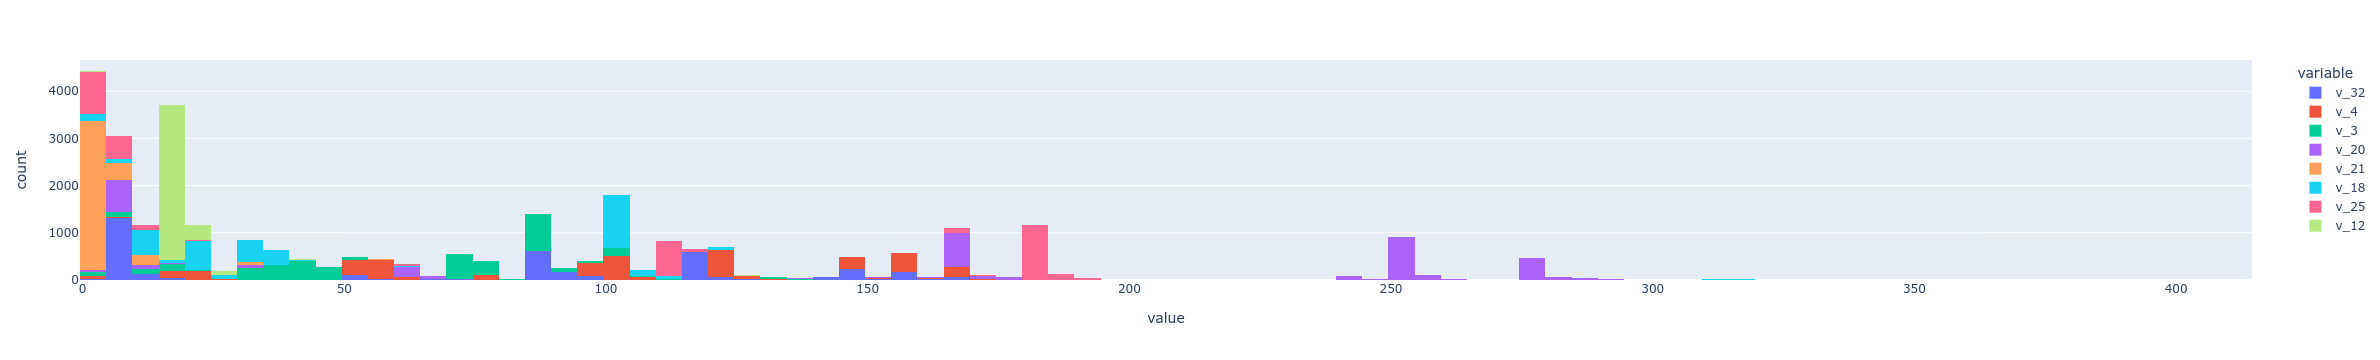

In [47]:
# pd.options.plotting.backend='matplotli'
final_data.loc[:, nominal].hist()

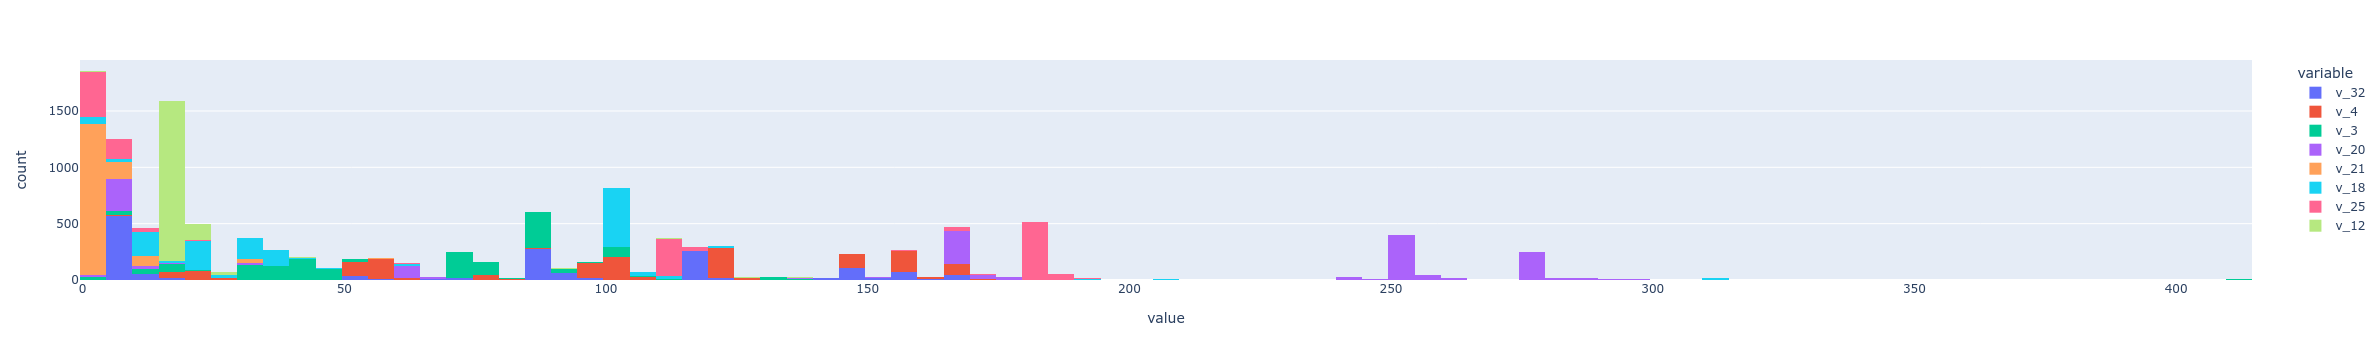

In [48]:
final_pred_data.loc[:, nominal].hist()

100%|█████████████████████████████████████████| 300/300 [00:05<00:00, 57.67it/s]


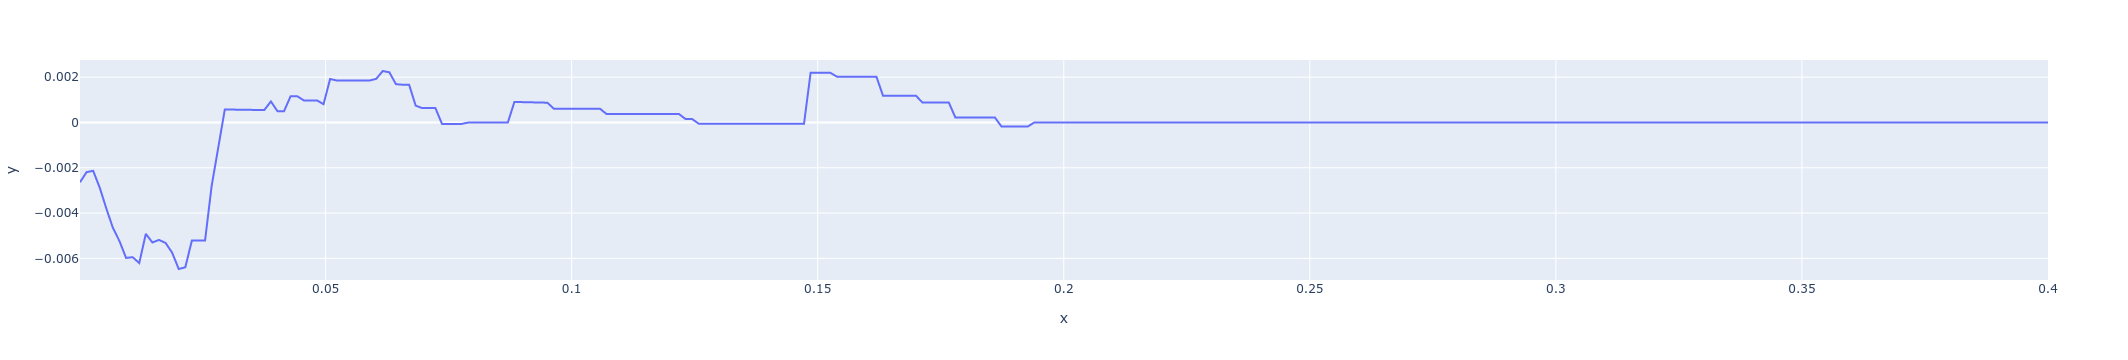

In [13]:
# ode = OneHotEncoder(min_frequency=0.01,handle_unknown='infrequent_if_exist')
import plotly.express as px

result_columns = []
search_space = np.linspace(0.0001, 0.4, num=300)
for s in tqdm(search_space):
    p = OneHotEncoder(
        min_frequency=s, handle_unknown="infrequent_if_exist", sparse=False
    )
    ohe_nominal = p.fit_transform(nominal_data)
    ohe_nominal = pd.DataFrame(
        ohe_nominal,
        index=nominal_data.index,
        columns=p.get_feature_names_out(),
    )
    # result_columns.append(len(ohe_nominal.columns))
    corr_ = ohe_nominal.corrwith(final_data.label, method="kendall")
    result_columns.append(corr_.mean())
px.line(
    x=search_space,
    y=result_columns,
)

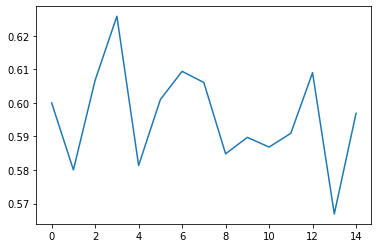

In [80]:
# plt.figure(figsize=(10,20))
# plt.plot(search_space,result_columns)
# sklearn.metrics.hamming_loss()
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold

# pipe = make_pipeline(VarianceThreshold(threshold=1000),OneHotEncoder(min_frequency=0.0001,handle_unknown='infrequent_if_exist',sparse=False),SVC())
pipe = make_pipeline(CountEncoder(), RandomForestClassifier())
# pipe = make_pipeline(JamesSteinEnco0der(),LogisticRegression(max_iter=1000,n_jobs=-1,multi_class='ovr'))
clf = OneVsRestClassifier(pipe)
# em = evaluate_model(pipe,
#                     # data=fin_data,
#                     features=nominal)

report = em.run(custom_model=pipe)
em.plot_metric("f1_macro")

In [18]:
fi__ = pd.get_dummies(final_data, columns=["label"])
ndf, wdf = iv_woe(fi__.loc[:, nominal + ["label_0"]], "label_0", show_woe=False)

Information value of v_32 is 0.476683
Information value of v_4 is 0.352446
Information value of v_3 is 0.224104
Information value of v_20 is 0.21722
Information value of v_21 is 0.051162
Information value of v_18 is 0.212168
Information value of v_25 is 0.224095
Information value of v_12 is 0.019726
